<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/catering_market_research_in_moscow/catering_market_research_in_moscow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ рынка заведений общественного питания Москвы

**Описание проекта:**

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

**Цель проекта:** подготовить исследование рынка заведений общественного питания Москвы


**Задачи проекта**:
1. Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
2. Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
3. Для какого вида объекта общественного питания характерно сетевое распространение?
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.
6. Выделить в отдельный столбец информацию об улице из столбца address .
7. Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
8. Найти число улиц с одним объектом общественного питания. Воспольоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
9. Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
10. Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.
11. Подготовить презентацию исследования для инвесторов


**План работы:**
1. Шаг 1. Загрузить данные и подготовить их к анализу,
2. Шаг 2. Проанализировать данные,
3. Шаг 3. Подготовить презентацию.

**Описание данных (структура таблицы rest_data):**

* id — *идентификатор объекта*
* object_name — *название объекта общественного питания*
* chain — *сетевой ресторан*
* object_type — *тип объекта общественного питания*
* address — *адрес*
* number — *количество посадочных мест*

## Изучение данных из файла

### Импорт библиотек, настройка отображения данных и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import pylab
import seaborn as sns
import math as mth
import requests
from pandas.io.json import json_normalize
from pprint import pprint
import json

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/rest_data.csv')

### Изучение таблицы rest_data

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


1. Заголовки таблицы оформлены по всем правилам, поэтому не нуждаются в исправлении.
2. Видно, что значения переменных **object_name** и **address** имеют символы, как в верхнем, так и в нижнем регистре. Это может приводить к разным проблемам, например, дублированию сущностей, поэтому необходимо привести все к нижнему регистру. 
3. Других проблем на данном этапе не обнаружено. Исправим те, что есть.

In [ ]:
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Проблема с использованием разных регистров в переменных object_name и address решена.

Теперь проверим адекватность используемых типов данных в наших переменных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Используемые типы данных адекватны.

Теперь проверим данные на наличие дубликатов и пропусков.

In [ ]:
df.duplicated().sum()

0

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2),
             columns = ['share_of_missing_values']) \
            .style.background_gradient('coolwarm')

,share_of_missing_values
id,0
object_name,0
chain,0
object_type,0
address,0
number,0


В данном наборе данных нет существенных недостатков: отсутствуют пропущенные значения и дубликаты.

In [ ]:
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

Переменная **chain** содержит информацию о том, является ли заведение общественного питания сетевым рестораном или нет. Однако значения "да" и "нет" немного сложны для восприятия, поэтому рекомендуем заменить их на "сетевое" "несетевое", соответственно.

In [ ]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})

**Общие выводы по разделу:**

1. На этапе предобработки был обнаружен ряд недостатков, которые были исправлены:
- Значения переменных **object_name** и **address** содержали одновременно символы верхнего и нижнего регистра;
- Использовались неинтуитивно понятные значения в переменной **chain**. Они были заменены на более понятные.
2. В остальном в предоставленных данных не наблюдается заметных недостатков: пропуски данных и дубликаты отсутствуют.
3. Данные достаточно чистые, поэтому можно переходить к рассчетам и анализу.

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

**Задача:**

Исследовать соотношение видов объектов общественного питания по количеству. Построить график.

In [ ]:
df.groupby('object_type')['object_name'] \
  .count() \
  .sort_values(ascending=False)

object_type
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_name, dtype: int64

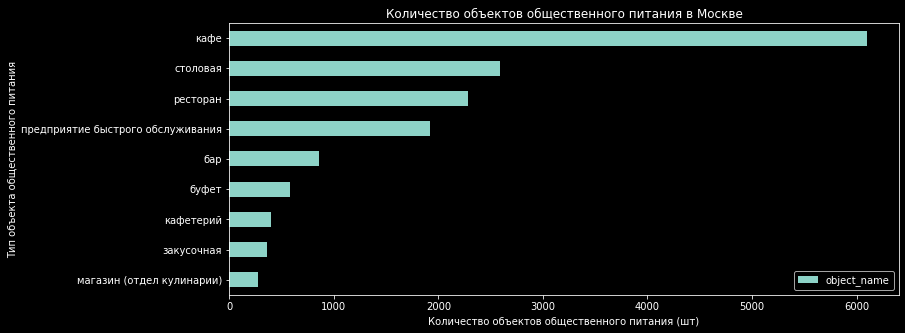

In [ ]:
ax = df.groupby('object_type') \
       .count().reset_index()[['object_type', 'object_name']] \
       .set_index('object_type') \
       .sort_values('object_name', ascending=True) \
       .plot(kind='barh', figsize=(12,5))

ax.set_xlabel('Количество объектов общественного питания (шт)')
ax.set_ylabel('Тип объекта общественного питания')
ax.set_title('Количество объектов общественного питания в Москве')
plt.show()

**Основые выводы:**

1. Среди различных типов заведений общесвенного питания наиболее распространенным (с отрывом от второй по распространенности позиции почти в 3 раза) является кафе: таких заведений 6099.
2. Также широко распространены такие типы заведений общественного питания, как столовая (2587 заведений), ресторан (2285 заведений) и предприятия быстрого обслуживания (1923 заведений).
3. К группе слабо распространенных типов заведений в Москве можно отнести бар (856 заведений), буфет (585 заведений), кафетерий (398 заведений), закусочная (360 заведений) и отдел кулинарии в магазине (наименее распространенный тип - насчитывает всего 273 заведений). 

### Cоотношение сетевых и несетевых заведений по количеству

**Задача:**

Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график

In [ ]:
df.groupby('chain')['object_name'] \
  .count() \
  .sort_values(ascending=False)

chain
несетевое    12398
сетевое       2968
Name: object_name, dtype: int64

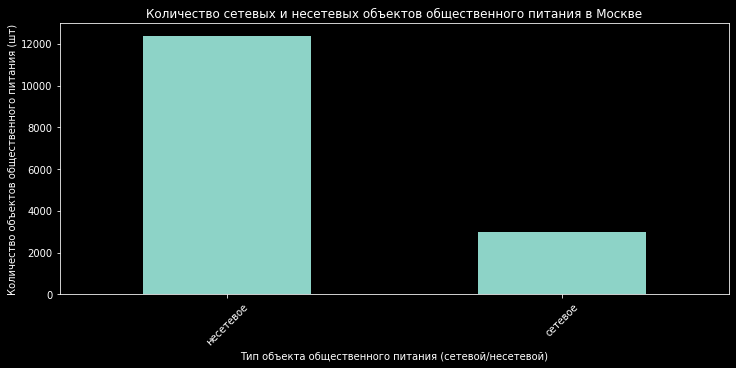

In [ ]:
ax = df.groupby('chain')['object_name'] \
       .count() \
       .sort_values(ascending=False) \
       .plot(kind='bar', figsize=(12,5))

ax.set_xlabel('Тип объекта общественного питания (сетевой/несетевой)')
ax.set_ylabel('Количество объектов общественного питания (шт)')
ax.set_title('Количество сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

**Основной вывод:**

В Москве преобладает несетевой тип заведений общественного питания: доля несетевых заведений в 4.2 раза больше доли сетевых заведений.

### Сетевое распространение для разных видов объектов общественного питания

**Задача:**

Ответить на вопрос "Для какого вида объекта общественного питания характерно сетевое распространение?"

In [ ]:
df_net = df.query('chain == "сетевое"') \
           .groupby('object_type')['object_name'] \
           .count() \
           .sort_values(ascending=False)

In [ ]:
df_not_net = df.query('chain == "несетевое"') \
               .groupby('object_type')['object_name'] \
               .count() \
               .sort_values(ascending=False)

In [ ]:
df_share_of_net = pd.DataFrame()
df_share_of_net['net'] = df_net
df_share_of_net['not_net'] = df_not_net

In [ ]:
df_share_of_net['share_of_net'] = (df_share_of_net['net'] / (df_share_of_net['not_net'] + df_share_of_net['net']))*100

In [ ]:
df_share_of_net.sort_values(by='share_of_net', ascending=False)

,net,not_net,share_of_net
object_type,,,
предприятие быстрого обслуживания,791,1132,41.134
магазин (отдел кулинарии),78,195,28.571
ресторан,544,1741,23.807
кафе,1396,4703,22.889
закусочная,56,304,15.556
кафетерий,52,346,13.065
бар,37,819,4.322
буфет,11,574,1.880
столовая,3,2584,0.116


**Основные выводы:**

1. Для всех типов заведений общественного питания в Москве доля заведений с сетевым видом распространения составляет менее половины. То есть можно сказать, что несетевой тип распространения более распространен для всех типов заведений общественного питания.
2. Наибольшая доля заведений с сетевым типом распространения наблюдается для предприятий быстрого обслуживания (41%).
3. Также высока доля заведений с сетевым типом распространения для отделов кулинарии магазинов (29%), ресторанов (24%) и кафе (23%).
4. Чуть меньшая доля - в закусочных (16%) и кафетериях (13%).
5. Практически отсутствуют сетевые заведения среди таких типов заведений общественного питания, как бары (4%), буфеты (2%) и столовые (менее 1%).

### Характеристики сетевых заведений (соотношения числа заведений и числа мест в них)

**Задача:**

Ответить на вопрос "Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?"

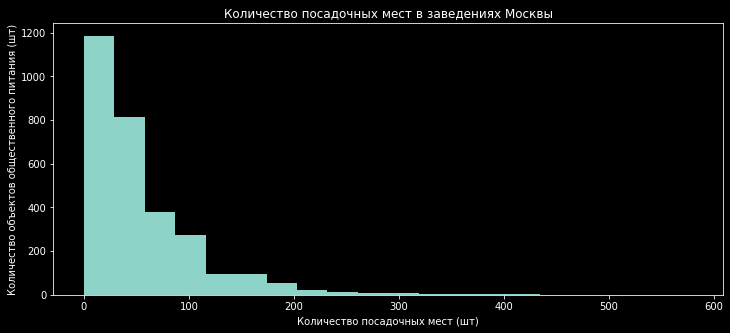

In [ ]:
ax = df.query('chain == "сетевое"')['number'] \
       .plot(bins=20, kind='hist', figsize=(12,5))

ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_ylabel('Количество объектов общественного питания (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы')
plt.show()

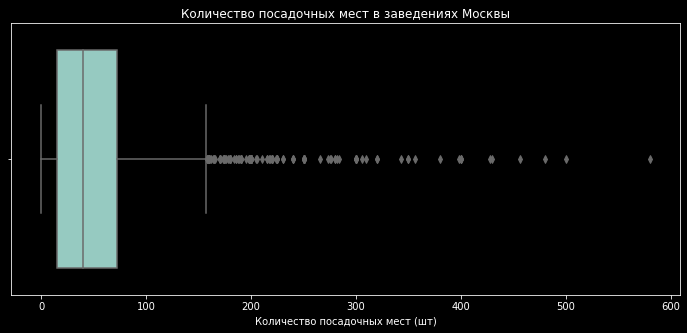

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(x=df.query('chain == "сетевое"')['number'])

ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы')

plt.show()

In [ ]:
df.query('chain == "сетевое"')['number'].describe()

count   2968.000
mean      52.920
std       57.141
min        0.000
25%       15.000
50%       40.000
75%       72.000
max      580.000
Name: number, dtype: float64

In [ ]:
place_and_seat = df.query('chain == "сетевое"') \
                   .groupby('object_type') \
                   .agg({'id':'count', 'number':'mean'}) \
                   .round(0) \
                   .rename(columns={"id": "count_of_places", "number": "count_of_seats"}) \
                   .sort_values('count_of_places', ascending = False)
place_and_seat

,count_of_places,count_of_seats
object_type,,
кафе,1396,47.000
предприятие быстрого обслуживания,791,40.000
ресторан,544,100.000
магазин (отдел кулинарии),78,9.000
закусочная,56,14.000
кафетерий,52,12.000
бар,37,53.000
буфет,11,13.000
столовая,3,112.000


In [ ]:
place_and_seat['count_of_places'].describe()

count      9.000
mean     329.778
std      487.990
min        3.000
25%       37.000
50%       56.000
75%      544.000
max     1396.000
Name: count_of_places, dtype: float64

Будем считать, что "много" посадочных мест - это больше среднего, то есть больше 53.

Будем также считать, что "много" заведений - это больше (или равно) медианной, то есть больше 56.

Таким образом, к типам сетевых заведений, где много заведений и много мест, относятся только рестораны. В остальных типах, где много заведений, мест обычно мало: кафе, предприятие быстрого обслуживания, магазин (отдел кулинарии) и закусочная.

С другой стороны, к типам сетевых заведений, где мало заведений, но много мест, относится только столовая. Однако этот вывод основан на 3 наблюдениях, так что адекватнее будет заключить, что столовые в целом редко относятся к сетевому типу заведений. Остальные типы заведений с небольшим числом заведений также отличаются малым числом посадочных мест.


**Дальше посмотрим на конкретные сети!**

In [ ]:
places_and_seats = df.query('chain == "сетевое"') \
                     .groupby('object_name') \
                     .agg({'id':'count', 'number':'mean'}) \
                     .round(0) \
                     .sort_values('id', ascending=False) \
                     .rename(columns={"id": "count_of_places", "number": "count_of_seats"}) \
                     .query('count_of_places > 1') \
                     .reset_index()
places_and_seats

,object_name,count_of_places,count_of_seats
0,шоколадница,157,57.000
1,kfc,155,55.000
2,макдоналдс,151,87.000
3,бургер кинг,137,47.000
4,теремок,94,26.000
...,...,...,...
241,кафе «costa coffee»,2,20.000
242,изба,2,18.000
243,зодиак,2,72.000
244,закусочная «бургер кинг»,2,20.000


По таблице сложно что-то понять, так что построим график.

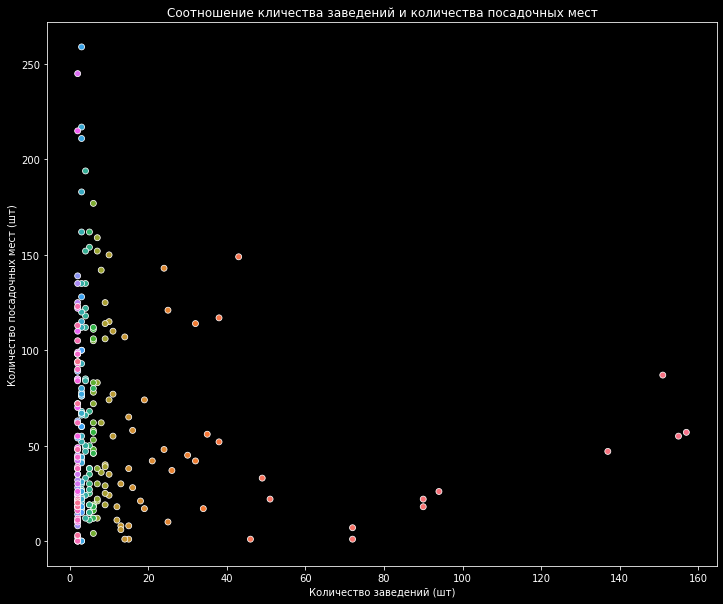

In [ ]:
plt.figure(figsize=(12,10))

ax = sns.scatterplot(data=places_and_seats, x="count_of_places", y="count_of_seats", hue="object_name", legend = False)

ax.set_ylabel('Количество посадочных мест (шт)')
ax.set_xlabel('Количество заведений (шт)')
ax.set_title('Соотношение кличества заведений и количества посадочных мест')

plt.show()

Судя по тому, что основное скопление точек расположено в левом нижнем углу, напрашивается вывод, что в основном для сетевых заведений характерно небольшое число заведений с небольшим числом посадочных мест в каждом.

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(x=df.query('chain == "сетевое"')['number'])

ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы')

plt.show()

Основные выводы:

1. Среднее число посадочных мест в заведениях общественного питания с сетевым типом распространения составляет 53, медианное - 40. 
2. 50% исследуемых заведений общественного питания имеют от 15 до 72 посадочных мест.
3. К типам сетевых заведений, где много заведений и много мест, относятся только рестораны. В остальных типах, где много заведений, мест обычно мало: кафе, предприятие быстрого обслуживания, магазин (отдел кулинарии) и закусочная.
4. С другой стороны, к типам сетевых заведений, где мало заведений, но много мест, относится только столовая. Однако этот вывод основан на 3 наблюдениях, так что адекватнее будет заключить, что столовые в целом редко относятся к сетевому типу заведений. Остальные типы заведений с небольшим числом заведений также отличаются малым числом посадочных мест.
5. **Для сетевых заведений характерно небольшое заведений с небольшим числом посадочных мест в каждом**. 

### Среднее количество посадочных мест для различных видов объектов общественного питания

**Задача:**

Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики

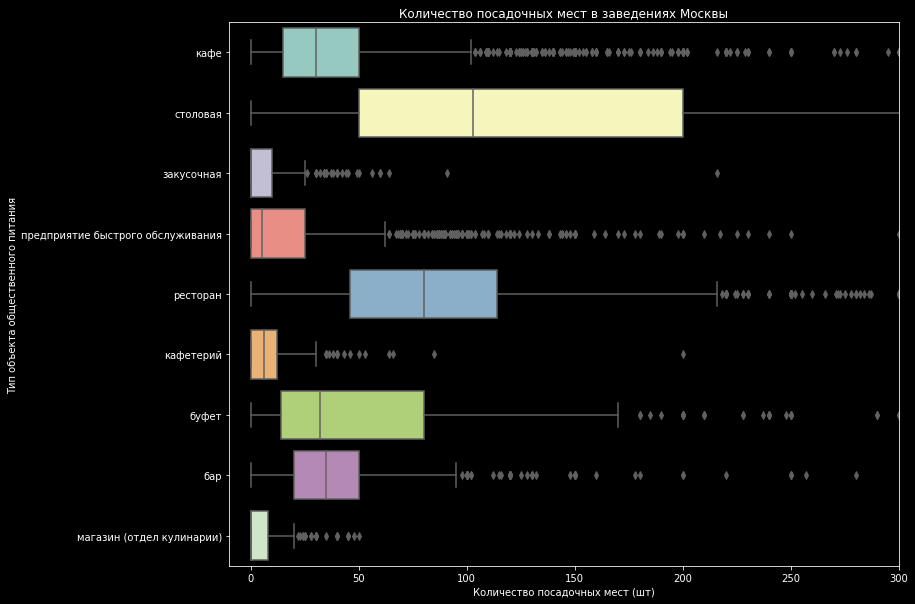

In [ ]:
plt.figure(figsize=(12,10))

ax = sns.boxplot(x='number', y='object_type', data=df)
ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_ylabel('Тип объекта общественного питания')
ax.set_title('Количество посадочных мест в заведениях Москвы')
ax.set_xlim(-10,300)
plt.show()

In [ ]:
df.groupby('object_type')['number'] \
  .describe() \
  .sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.000,130.247,95.179,0.000,50.000,103.000,200.000,1400.000
ресторан,2285.000,96.834,94.757,0.000,46.000,80.000,114.000,1500.000
буфет,585.000,51.130,56.332,0.000,14.000,32.000,80.000,320.000
бар,856.000,43.494,67.083,0.000,20.000,35.000,50.000,1700.000
кафе,6099.000,39.716,37.721,0.000,15.000,30.000,50.000,533.000
предприятие быстрого обслуживания,1923.000,20.552,38.367,0.000,0.000,5.000,25.000,580.000
кафетерий,398.000,9.123,14.639,0.000,0.000,6.000,12.000,200.000
закусочная,360.000,7.608,16.651,0.000,0.000,0.000,10.000,216.000
магазин (отдел кулинарии),273.000,5.590,9.873,0.000,0.000,0.000,8.000,50.000


In [ ]:
grp_order = df.groupby('object_type')['number'] \
              .mean() \
              .sort_values(ascending=False) \
              .index

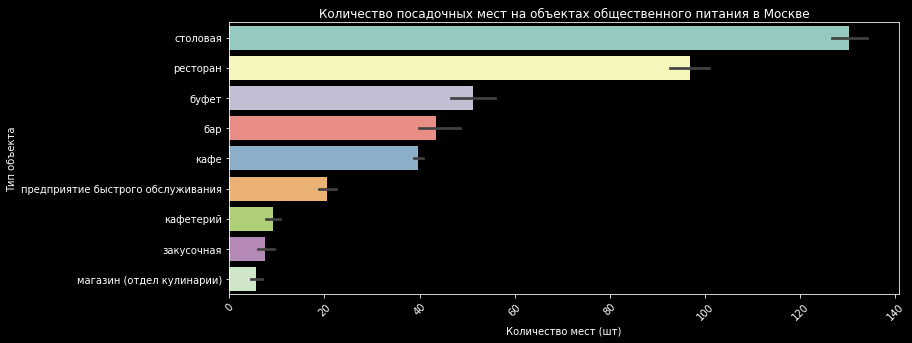

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='number', y='object_type', data=df, order=grp_order)

ax.set_xlabel('Количество мест (шт)')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество посадочных мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

**Основные выводы:**

1. Наибольшее количество посадочных мест в среднем предоставляют столовые (130 мест в среднем) и рестораны (97 мест в среднем).
2. Во вторую группу по среднему числу посадочных мест можно отнести буфеты (51 место в среднем), бары (44 места в среднем) и кафе (40 мест в среднем).
3. К аутсайдерам по количеству посадочных мест относятся предприятия быстрого обслуживания (21 место в среднем), кафетерии (9 мест в среднем), закусочные (8 мест в среднем) и отделы кулинарии в магазинах (6 мест в среднем). Медианные значения для последних двух - 0, то есть обычно данные типы заведений обходятся совсем без посадочных мест.

### Определение улицы

**Задача:**

Выделить в отдельный столбец информацию об улице из столбца address

In [ ]:
symbols = [',', '«', '»', '(', ')', '"', '  ']

for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, ' ')
    df['address'] = df['address'].str.replace(s, ' ')

In [ ]:
street = df['address'].to_list()

In [ ]:
streets_only = []
for street in street:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+12:end-1])

In [ ]:
df['street_name'] = streets_only

In [ ]:
df['street_name']

0                                    улица егора абакумова
1                                         улица талалихина
2                                     абельмановская улица
3                                       абрамцевская улица
4                                       абрамцевская улица
                               ...                        
15361                               3-й крутицкий переулок
15362                                   улица земляной вал
15363                                   улица земляной вал
15364     поселение московский киевское шоссе 22-й кило...
15365                                    ходынский бульвар
Name: street_name, Length: 15366, dtype: object

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица


In [ ]:
df[df['street_name'] == '']['street_name'].count()

10

In [ ]:
df[df['street_name'] == '']

,id,object_name,chain,object_type,address,number,street_name
335,21268,центр социального обеспечения,несетевое,столовая,город москва домодедовская улица дом 24 корпус 4,35,
3654,72236,пончики,несетевое,предприятие быстрого обслуживания,город москва домостроительная улица дом 1 корп...,4,
3693,29030,гбоу школа 548 кдп,несетевое,столовая,город москва домодедовская улица дом 35 корпус 2,150,
4040,29023,гбоу школа 1207 кдп,несетевое,столовая,город москва домодедовская улица дом 24 корпус 7,200,
4068,157787,донеретто,несетевое,предприятие быстрого обслуживания,город москва домодедовская улица дом 25 корпус 1,0,
4082,153147,пекарня пепела,несетевое,предприятие быстрого обслуживания,город москва домодедовская улица дом 28,0,
9542,164788,пиццерия,несетевое,предприятие быстрого обслуживания,город москва домодедовская улица дом 28,0,
10069,171720,django lounge кальян-бар,несетевое,бар,город москва домостроительная улица дом 1 корп...,70,
12106,177805,додо пицца,сетевое,кафе,город москва домодедовская улица дом 42а,9,
12298,201629,шаурма,несетевое,предприятие быстрого обслуживания,город москва домодедовская улица дом 42,0,


10 улиц потерялось из-за того, что они начинаются на "дом", то есть немного ломают паттерн работы нашей функции. Но их не много, так что можно заменить вручную. 

In [ ]:
df.loc[df['id'] == 72236, 'street_name'] = 'домостроительная улица' 
df.loc[df['id'] == 171720, 'street_name'] = 'домостроительная улица' 
df['street_name'][df['street_name'] == ''] = 'домодедовская улица'

In [ ]:
df[df['street_name'] == '']['street_name'].count()

0

Больше в переменной street_name нет пропущенных значений.

**Основной результат:**

Теперь информация об улице из столбца address выделена в отдельный столбец street_name.

### Топ-10 улиц по количеству объектов общественного питания

**Задача:**

Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
top_10 = df.groupby('street_name') \
           .count() \
           .sort_values(by='object_type', ascending=False) \
           .head(10) \
           .reset_index()[['street_name', 'object_type']] \
           .rename(columns={"street_name": "street_name", "object_type": "count_of_objects"})
top_10

,street_name,count_of_objects
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,170
3,пресненская набережная,167
4,варшавское шоссе,155
5,ленинский проспект,147
6,проспект вернадского,131
7,кутузовский проспект,114
8,каширское шоссе,103
9,кировоградская улица,102


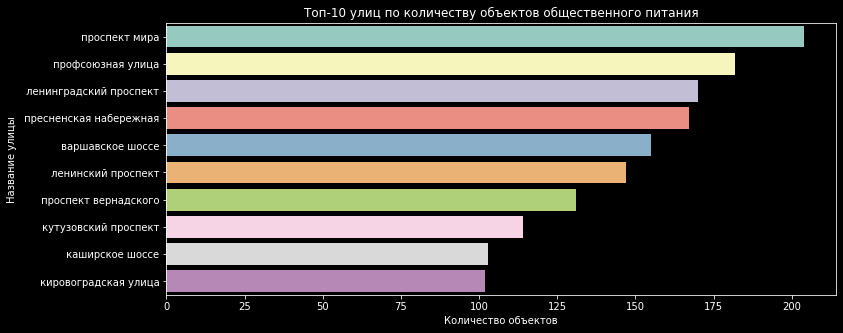

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='count_of_objects', y='street_name', data=top_10, palette="Set3")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

**Топ-10 улиц по количеству объектов общественного питания с указанием района (согласно данным из ВИКИ):**

1. **Проспект Мира:** Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино

2. **Профсоюзная улица:** Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево

3. **Ленинградский проспект:** Беговой, Аэропорт, Сокол, Хорошёвский

4. **Пресненская набережная:** Пресненский

5. **Варшавское шоссе:** Донской, Нагатино-Садовники, Нагорный

6. **Ленинский проспект:** Гагаринский и Донской

7. **Проспект Вернадского:** Проспект Вернадского

8. **Кутузовский проспект:** Дорогомилово, Фили-Давыдково

9. **Каширское шоссе:** Нагатино-Садовники и Нагорный

10. **Кировоградская улица:** Чертаново Северное, Чертаново Центральное, Чертаново Южное

### Число улиц с одним объектом общественного питания

**Задача:**

Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
len(df.groupby('street_name').count().query('number == 1'))

813

In [ ]:
number_equal_1 = df.groupby('street_name').count().query('number == 1')
number_equal_1 = number_equal_1.reset_index()

In [ ]:
street_name_number_equal_1_list = list(number_equal_1['street_name'])

In [ ]:
street_name_number_equal_1_list = df[df['street_name'].isin(street_name_number_equal_1_list)]

In [ ]:
address_list = street_name_number_equal_1_list['address'].tolist()

In [ ]:
key = 'a9088ca2-3fd9-460f-bf9b-3a1cb8ed84d1'
url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
coords = []
for address in address_list:
    r = requests.get(str(url) + str(key) + '&format=json&geocode=' + str(address) + '&kind=metro&results=1').json()
    try:
        r = str(r)
        start = r.find('Point')
        r = r[start:]
        coords.append(r)
    except Exception:
        coords.append('Что-то пошло не так')

In [ ]:
test_coords = coords[:]

In [ ]:
beta = []

In [ ]:
for i in range(len(test_coords)):
    result = test_coords[i][17:]
    beta.append(result)

In [ ]:
gamma = []

In [ ]:
for i in range(len(beta)):
    stop = beta[i].find('\'')
    gamma.append(beta[i][:stop])

In [ ]:
omega = []

In [ ]:
for i in range(len(gamma)):
    gamma[i] = gamma[i].replace(' ', ',')
    omega.append(gamma[i])

In [ ]:
street_name_number_equal_1_list['coords'] = omega

In [ ]:
key = 'a9088ca2-3fd9-460f-bf9b-3a1cb8ed84d1'
url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
station = []
for o in omega:
    r = requests.get(url + key + '&format=json&geocode=' + o + '&kind=metro&results=1').json()
    try:
        res = json_normalize(r['response']['GeoObjectCollection']['featureMember'])['GeoObject.name'][0]    
        station.append(res)
    except Exception:
        station.append('Что-то пошло не так')

In [ ]:
street_name_number_equal_1_list['station'] = station

In [ ]:
street_name_number_equal_1_list.query('station != "Что-то пошло не так"') \
                               .groupby('station') \
                               .count() \
                               .sort_values('id', ascending=False) \
                               .head(10)['number']

station
метро Коммунарка      24
метро Рассказовка     23
станция Нахабино      18
метро Бабушкинская    15
метро Смоленская      13
метро Марьина Роща    12
метро Сокольники      12
станция Подольск      11
метро Таганская       11
метро Медведково      10
Name: number, dtype: int64

**Основной вывод:**

Наибольшее число заведений с одним местом размещения расположены возле станций метро Коммунарка (24 заведения), Рассказовка (23 заведения) и Нахабино (18 заведений). 

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

**Задача:**

Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

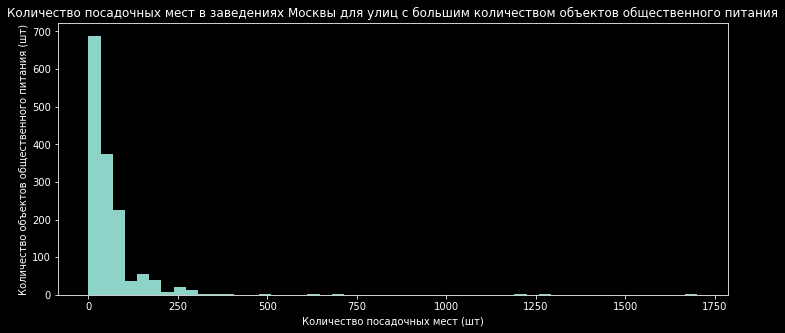

In [ ]:
ax = df[df['street_name'].isin(top_10['street_name'])]['number'].plot(bins=50, kind='hist', figsize=(12,5))

ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_ylabel('Количество объектов общественного питания (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы для улиц с большим количеством объектов общественного питания')

plt.show()

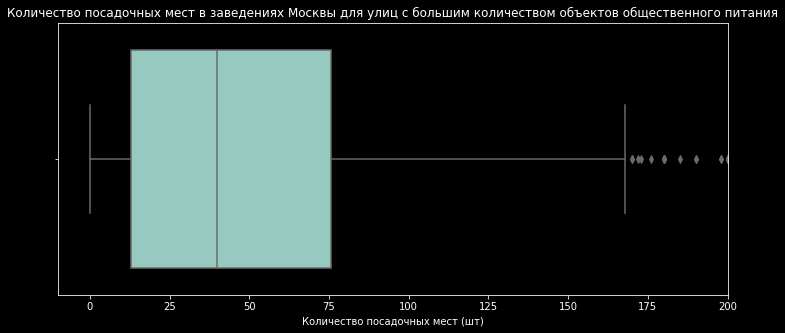

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(x=df[df['street_name'].isin(top_10['street_name'])]['number'])
ax.set_xlabel('Количество посадочных мест (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы для улиц с большим количеством объектов общественного питания')
ax.set_xlim(-10,200)
plt.show()

In [ ]:
df_top_10 = df[df['street_name'].isin(top_10['street_name'])]

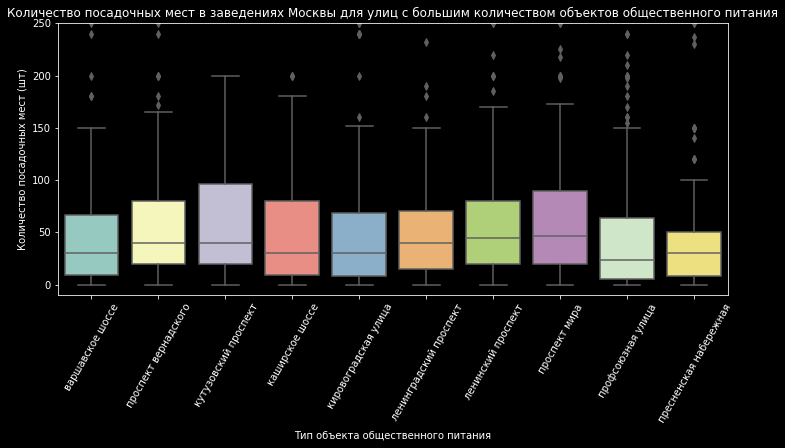

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(x="street_name", y="number", data=df_top_10, orient='v')
ax.set_xlabel('Тип объекта общественного питания')
ax.set_ylabel('Количество посадочных мест (шт)')
ax.set_title('Количество посадочных мест в заведениях Москвы для улиц с большим количеством объектов общественного питания')
plt.xticks(rotation=60)
ax.set_ylim(-10,250)
plt.show()

In [ ]:
df_top_10['number'].describe()

count   1475.000
mean      58.532
std       90.521
min        0.000
25%       13.000
50%       40.000
75%       75.500
max     1700.000
Name: number, dtype: float64

**Основные выводы:**

1. Среднее число посадочных мест для улиц с большим количеством объектов общественного питания составлет 59, медианное - 40.
2. 50% исследуемых заведений общественного питания имеют от 13 до 75 посадочных мест.
3. Из вышесказанного следует вывод, что для заведений, которые расположены на улицах с большим количеством объектов общественного питания, характерно много заведений с небольшим числом посадочных мест в каждом.
4. Среди топ-10 по среднему числу посадочных мест лидирует Кутузовский проспект и Проспект мира.

**Рекомендации:**

1. **Рекомендуется открывать кафе на улице, входящей в топ-10 заведений по количеству заведений общественного питания**. Раз конкуренты предпочитают открываться на них, значит там явно есть спрос. Однако рекомендуется размещаться не в первой пятерке, а во второй, чтобы с большей вероятностью выдерживать конкуренцию. Подойдут следующие улицы: ленинский проспект, проспект Вернадского, кутузовский проспект, каширское шоссе и кировоградская улица.
2. **Тип заведения рекомендуется выбрать среди наиболее знакомых москвичам, то есть наиболее распространенных**. Такая логика продиктована тем, что для посетителей уже будет одна абсолютно незнакомая характеристика заведения – роботы-служащие. Если остальные характеристики также будут в новинку для аудитории, можно столкнуться с полным непониманием/неприятием. 
3. **Таким образом тип заведения рекомендуется выбирать из следующего списка: кафе, столовая, ресторан и предприятие быстрого обслуживания**. При выборе из них можно руководствоваться, например, тем типом обслуживания, с которым лучше справятся используемые роботы.
4. По той же логике привычности для москвичей **рекомендуется выбрать несетевой тип заведения общественного питания**.

## Подготовка презентации

**Задача:**

Подготовить презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:

Презентация: <https://disk.yandex.ru/i/bqpTxvwaq8_kug>